In [10]:
import oda_api.api
import oda_api.token
import oda_api.plot_tools
import requests
import logging

# https://gcn.gsfc.nasa.gov/gcn3/32634.gcn3

In [11]:
# #slightly more verbose
# logging.getLogger().setLevel(logging.INFO)
# #all messages
# #logging.getLogger().setLevel(logging.DEBUG)

# logging.getLogger('oda_api').addHandler(logging.StreamHandler())

In [12]:
from matplotlib import pylab as plt

In [13]:
# 120711 https://www.aanda.org/articles/aa/pdf/2014/07/aa20872-12.pdf
# https://www.cosmos.esa.int/web/integral/schedule-information

In [14]:
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.time import Time
import pandas as pd
import numpy as np

In [63]:
T0_isot = "2022-10-09T13:17:00"

T0_ijd = Time(T0_isot).mjd - 51544


In [16]:
src_coord = SkyCoord("19h 13m 03.43s","+19d 46m 23.1s", unit=u.deg)
source_name = "GRB221009A"

In [17]:
scw_dict = pd.DataFrame(requests.get("https://www.astro.unige.ch/mmoda/dispatch-data/gw/timesystem/api/v1.0/scwlist/nrt/2022-10-08T00:39:04/2022-10-23T08:02:00?"
             f"ra={src_coord.ra.deg}&dec={src_coord.dec.deg}&radius=10&return_columns=SWID,SW_TYPE,TELAPSE").json())

scw_list = scw_dict['SWID'][scw_dict['SW_TYPE'].str.strip() == "POINTING"]

print("\n".join(scw_list))

255800700010
255800700020
255800710010
255800720010
255800730010
255800740010
255800750010
255800760010
255800770010
255800780010
255800790010
255800800010
255800810010
255800820010
255800820020


In [18]:
np.sum(scw_dict.TELAPSE[scw_dict['SW_TYPE'].str.strip() == "POINTING"])

52779.03408310375

In [19]:
disp = oda_api.api.DispatcherAPI()

isgri_image = disp.get_product(
    instrument="isgri",
    product="isgri_image",
    E1_keV=28,
    E2_keV=80,
    integral_data_rights="all-private",
    scw_list=[s + ".000" for s in scw_list],
    token=oda_api.token.discover_token()
#     src_coord
)

found token in file in home your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1665754870,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}
found token in file in home your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1665754870,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}
token expires in 72.8 h
token expires in 72.8 h
please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 59862.602477 from DATE-OBS.
Set MJD-END to 59863.230405 from DATE-END'. [astropy.wcs.wcs]
/home/savchenk/miniconda-recent/lib/python3.9/site-packages/oda_api/plot_tools.py:90: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


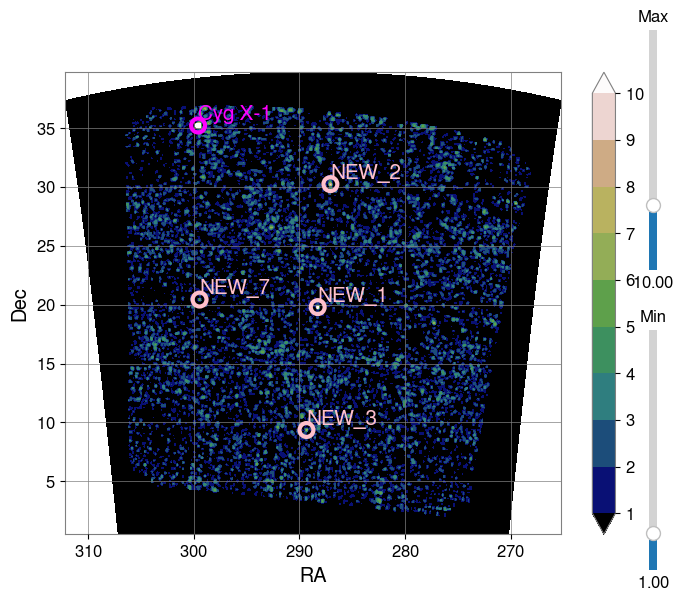

In [20]:
oda_api.plot_tools.OdaImage(isgri_image).show()

In [21]:
isgri_image.mosaic_image_0_mosaic.data_unit[4].header

{'BASETYPE': 'DAL_ARRAY',
 'BITPIX': -32,
 'BSCALE': 1,
 'BUNIT': 'no units',
 'BZERO': 0,
 'CD1_1': -0.0822862539155913,
 'CD1_2': 0.0,
 'CD2_1': 0.0,
 'CD2_2': 0.0822862539155913,
 'CHANMAX': 80,
 'CHANMIN': 28,
 'CHANTYPE': 'PI',
 'CHECKSUM': '7l2E9j197j1E7j19',
 'COMMENT': 'STAMP :',
 'CONFIGUR': 'osa_2021-08-27T14:27:00',
 'CREATOR': 'ii_skyimage 5.4.4',
 'CRPIX1': 248.0,
 'CRPIX2': 249.0,
 'CRVAL1': 288.678649902344,
 'CRVAL2': 20.1353397369385,
 'CTYPE1': 'RA---TAN',
 'CTYPE2': 'DEC--TAN',
 'CUNIT1': 'deg',
 'CUNIT2': 'deg',
 'DATASUM': '2812091568',
 'DATE': '2022-10-11T10:44:51',
 'DATE-END': '2022-10-11T05:31:47',
 'DATE-OBS': '2022-10-10T14:27:34',
 'DEADC': 0.714398013758639,
 'DETNAM': 'ISGRI',
 'EQUINOX': 2000.0,
 'EXTNAME': 'ISGR-MOSA-IMA',
 'EXTREL': '7.4',
 'EXTVER': 3,
 'E_MAX': 80.0,
 'E_MEAN': 54.0,
 'E_MIN': 28.0,
 'GCOUNT': 1,
 'GRPID1': 1,
 'HDUCLAS1': 'IMAGE',
 'HDUCLASS': 'OGIP',
 'HDUDOC': 'ISDC-IBIS ICD',
 'HDUVERS': '1.1.0',
 'IMATYPE': 'SIGNIFICANCE',
 'INS

In [22]:
cat = isgri_image.dispatcher_catalog_1

toremove = []
for i, r in enumerate(cat.table.iterrows()):
    print(r)
    if r[1].startswith('NEW_') or r[1].startswith('GRB'):
        toremove.append(i)        

cat.table.add_row(
{
    'src_names': source_name,
    'ra': src_coord.ra.deg,
    'dec': src_coord.dec.deg,
    'ISGRI_FLAG': 1,
    'FLAG': 1,
    'ERR_RAD': 0.05,    
})

cat.table.remove_rows(toremove)

cat.table

(9, 'Cyg X-1', 70.86481475830078, 299.59515380859375, 35.21075439453125, -32768, 2, 0, 0.0002800000074785203)
(80, 'NEW_1', 14.195497512817383, 288.2669372558594, 19.789119720458984, -32767, 0, 0, None)
(81, 'NEW_2', 10.256473541259766, 287.065185546875, 30.233415603637695, -32767, 0, 0, None)
(82, 'NEW_3', 7.058259010314941, 289.33172607421875, 9.35339641571045, -32767, 0, 0, None)
(86, 'NEW_7', 7.163979530334473, 299.45709228515625, 20.43015480041504, -32767, 0, 0, None)


meta_ID,src_names,significance,ra,dec,NEW_SOURCE,ISGRI_FLAG,FLAG,ERR_RAD
,,,deg,deg,,,,
int64,str10,float64,float64,float64,int64,int64,int64,object
9,Cyg X-1,70.86481475830078,299.59515380859375,35.21075439453125,-32768,2,0,0.0002800000074785203
0,GRB221009A,0.0,288.26429166666657,19.773083333333332,0,1,1,0.05


In [23]:
from astropy.table import Table

m_source = [not s.startswith('NEW') for s in cat.table['src_names']]
cat.table = Table(cat.table[m_source])

cat.get_api_dictionary()

'{"cat_frame": "fk5", "cat_coord_units": "deg", "cat_column_list": [[9, 0], ["Cyg X-1", "GRB221009A"], [70.86481475830078, 0.0], [299.59515380859375, 288.26429166666657], [35.21075439453125, 19.773083333333332], [-32768, 0], [2, 1], [0, 1], [0.0002800000074785203, 0.05]], "cat_column_names": ["meta_ID", "src_names", "significance", "ra", "dec", "NEW_SOURCE", "ISGRI_FLAG", "FLAG", "ERR_RAD"], "cat_column_descr": [["meta_ID", "<i8"], ["src_names", "<U10"], ["significance", "<f8"], ["ra", "<f8"], ["dec", "<f8"], ["NEW_SOURCE", "<i8"], ["ISGRI_FLAG", "<i8"], ["FLAG", "<i8"], ["ERR_RAD", "|O"]], "cat_lat_name": "dec", "cat_lon_name": "ra"}'

In [44]:
from ddpaper.draftdata import DraftData

with DraftData() as dd:
    dd['obs'] = dict(
        tstart_isot="",
        tstop_isot=""
    )


In [95]:
source_products = {}

for product in [
        "isgri_lc",
        "isgri_spectrum",
        "isgri_image",
        "isgrihe_image",
        "jemx1_lc",
        "jemx1_spectrum",
        "jemx1_image",
        "jemx2_lc",
        "jemx2_spectrum",
        "jemx2_image",
    ]:
    disp.wait = False
    
    if 'jemx' in product:
        e1, e2 = 3, 30
    else:
        e1, e2 = 28, 80
    
    jnum = 1
    product_pass = product

    if 'jemx1' in product:
        jnum=1
        product_pass = product.replace("jemx1_", "jemx_")
    elif 'jemx2' in product:
        jnum=2
        product_pass = product.replace("jemx2_", "jemx_")
    elif 'isgrihe' in product:
        e1, e2 = 80, 200
        product_pass = product.replace("isgrihe_", "isgri_")
    
    source_products[product] = disp.get_product(
        instrument=product_pass.split("_")[0],
        product=product_pass,
        osa_version="OSA11.2",
        scw_list=[s+".000" for s in scw_list],
        token = oda_api.token.discover_token(),
        E1_keV=e1,
        E2_keV=e2,
        jemx_num=jnum,
        selected_catalog=cat.get_api_dictionary(),
        integral_data_rights="all-private",
    )

found token in file in home your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1665754870,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}
found token in file in home your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1665754870,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}
token expires in 71.4 h
token expires in 71.4 h
please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation

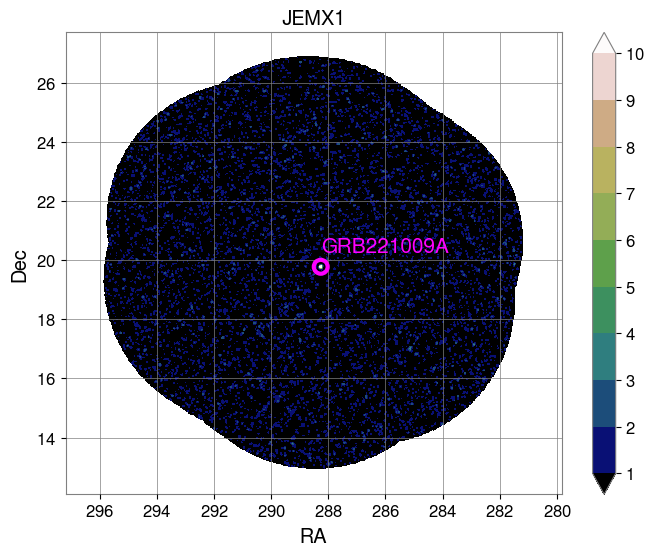

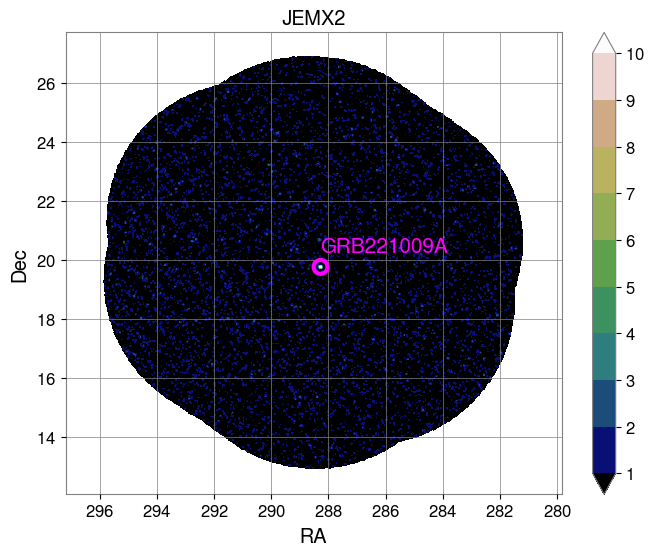

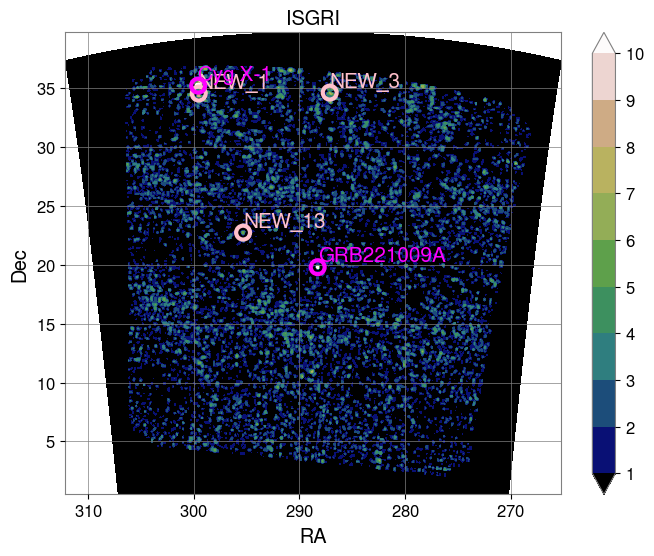

In [97]:
for instrument in 'jemx1', 'jemx2', 'isgri':
    p = source_products[instrument + '_image']
    oda_api.plot_tools.OdaImage(p).show(sliders=False) #, header="JEM-X")
    plt.title(instrument.upper())
    plt.savefig(f"figs/{instrument}.png")

    with DraftData() as dd:
        dd[instrument] = {'snr': float(p.dispatcher_catalog_1.table[p.dispatcher_catalog_1.table['src_names'] == "GRB221009A"]['significance'][0])}


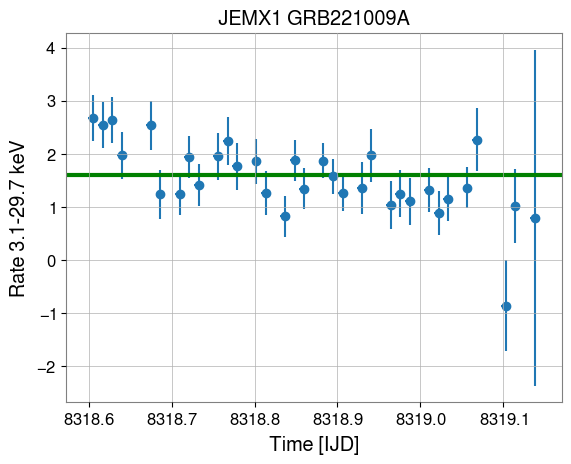

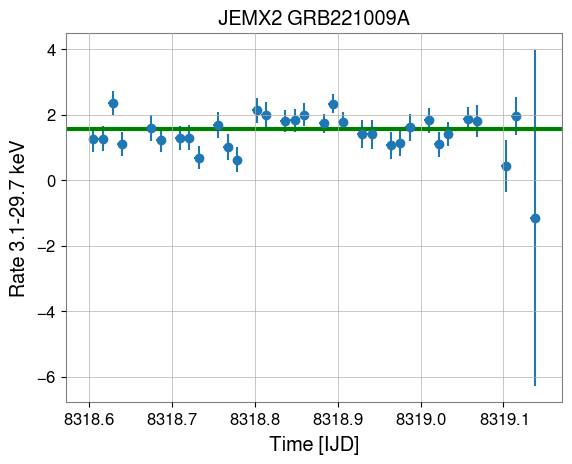

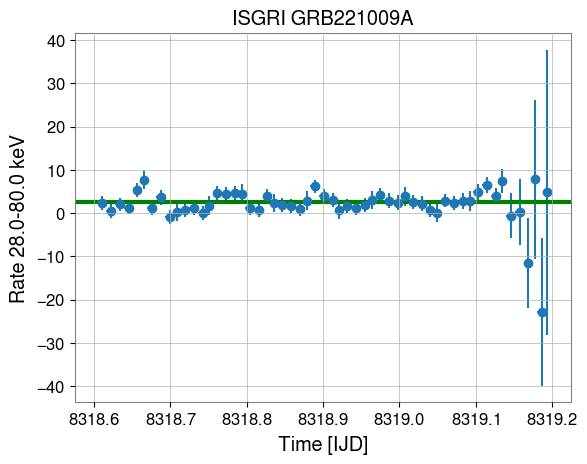

In [59]:
for instrument in 'jemx1', 'jemx2', 'isgri':
    oda_api.plot_tools.OdaLightCurve(source_products[instrument + '_lc']).show(in_source_name='GRB221009A')
    plt.title(instrument.upper() + " " + source_name)
    plt.savefig(f"figs/lc_{instrument}.png")


In [90]:
for instrument in 'jemx1', 'jemx2', 'isgri':
    oda_api.plot_tools.OdaSpectrum(source_products[instrument + '_spectrum']).write_fits('GRB221009A')

Saving spectrum ./JMX1_spectrum_GRB221009A.fits with rmf ./JMX1_rmf_GRB221009A.fits and arf ./JMX1_arf_GRB221009A.fits
Saving spectrum ./JMX1_spectrum_GRB221009A.fits with rmf ./JMX1_rmf_GRB221009A.fits and arf ./JMX1_arf_GRB221009A.fits
Saving spectrum ./JMX2_spectrum_GRB221009A.fits with rmf ./JMX2_rmf_GRB221009A.fits and arf ./JMX2_arf_GRB221009A.fits
Saving spectrum ./JMX2_spectrum_GRB221009A.fits with rmf ./JMX2_rmf_GRB221009A.fits and arf ./JMX2_arf_GRB221009A.fits
Saving spectrum ./IBIS_spectrum_GRB221009A.fits with rmf ./IBIS_rmf_GRB221009A.fits and arf ./IBIS_arf_GRB221009A.fits
Saving spectrum ./IBIS_spectrum_GRB221009A.fits with rmf ./IBIS_rmf_GRB221009A.fits and arf ./IBIS_arf_GRB221009A.fits


In [91]:
with DraftData() as dd:
    dd['joint_fit'] = dict(
        e1_keV=3,
        e2_keV=80,
        flux_ecs = 4.4263e-10, # ergs/cm^2/s) range (3.0000 - 80.000 keV
        flux_ecs_err_68p = (4.215e-10 - 4.4263e-10, 4.670e-10 - 4.4263e-10),
        slope = 2.15041,
        slope_err_90p = (-0.0712388,0.0841283)
    )

/home/savchenk/miniconda-recent/lib/python3.9/site-packages/ddpaper/draftdata.py:20: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  self.data = yaml.load(


In [66]:
acslc_r = requests.get(f"https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/{T0_ijd}/2000")
import pandas as pd
import io

acslc = pd.read_csv(io.StringIO(acslc_r.text), skiprows=5, names=['t', 'dt', 'c', 'ds'], delim_whitespace=True)
acslc

,t,dt,c,ds
0,8317.530324,0.035319,5258.0,45750.851319
1,8317.530325,0.085318,5296.0,45750.901318
2,8317.530326,0.135319,5274.0,45750.951319
3,8317.530326,0.185319,5270.0,45751.001318
4,8317.530327,0.235318,5248.0,45751.051318
...,...,...,...,...
79995,8317.576618,3999.787994,5336.0,49750.603994
79996,8317.576618,3999.837995,5348.0,49750.653995
79997,8317.576619,3999.887997,5396.0,49750.703996
79998,8317.576620,3999.937996,5444.0,49750.753996


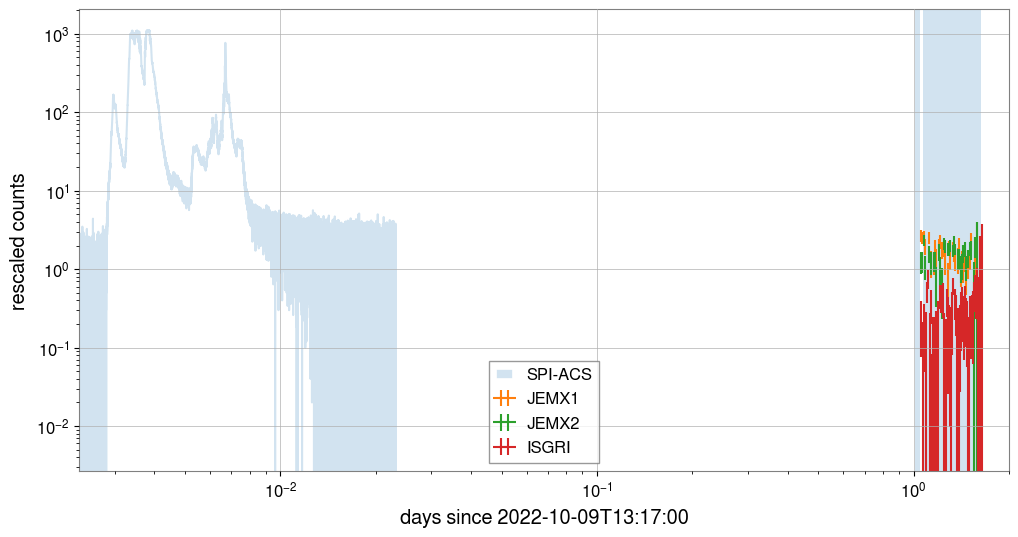

In [99]:
d_j1 = source_products['jemx1_lc'].jemx_lc_0_GRB221009A.data_unit[2].data 
d_j2 = source_products['jemx2_lc'].jemx_lc_0_GRB221009A.data_unit[2].data 
d_i = source_products['isgri_lc'].isgri_lc_1_GRB221009A.data_unit[1].data

plt.figure(figsize=(12,6))

plt.plot(
    acslc.t - T0_ijd,
    (acslc.c - 5200)/1e2,
    alpha=0.2,
    label="SPI-ACS"
)


for d, f, n in [
    (d_j1, 1, 'JEMX1'),
    (d_j2, 1, 'JEMX2'),
    (d_i, 0.1, 'ISGRI'),
]:
    plt.errorbar(
        d['TIME'] - T0_ijd, 
        f*d['RATE'], f*d['ERROR'], xerr=d['TIMEDEL']/2, ls="", label=n)



plt.loglog()
plt.xlim([200./24/3600, 2])
plt.legend()
plt.xlabel(f"days since {T0_isot}")

plt.axvspan(Time("2022-10-10 13:27:56").mjd - 51544 - T0_ijd, Time("2022-10-10 14:27:28").mjd - 51544 - T0_ijd, alpha=0.2)
plt.axvspan(Time("2022-10-10 15:02:00").mjd - 51544 - T0_ijd, Time("2022-10-11 04:19:48").mjd - 51544 - T0_ijd, alpha=0.2)

np.sum(d['TIMEDEL'])*24*3600

plt.ylabel("rescaled counts")
plt.savefig("figs/joint_lc.png")

In [93]:
with DraftData() as dd:
    dd['T0_isot'] = T0_isot
    dd['obs']['tstart_isot'] = Time(d_j1['TIME'].min()+51544, format='mjd').isot
    dd['obs']['tstart_since_t0'] = d_j1['TIME'].min() - T0_ijd
    dd['obs']['tstop_isot'] = Time(d_j1['TIME'].max()+51544, format='mjd').isot
    dd['obs']['tstop_since_t0'] = d_j1['TIME'].max() - T0_ijd
    dd['obs']['ontime_s'] = np.sum(d_j1['TIMEDEL'])*24*3600

/home/savchenk/miniconda-recent/lib/python3.9/site-packages/ddpaper/draftdata.py:20: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  self.data = yaml.load(


In [ ]:
source_products['jemx_image'].dispatcher_catalog_1.table

meta_ID,src_names,significance,ra,dec,FLAG,ERR_RAD
,,,deg,deg,,
int64,str10,float64,float64,float64,int64,float64
0,GRB221009A,27.894235610961914,288.2706298828125,19.776111602783203,0,0.05000000074505806


In [ ]:
source_products['isgri_image'].dispatcher_catalog_1.table

meta_ID,src_names,significance,ra,dec,NEW_SOURCE,ISGRI_FLAG,FLAG,ERR_RAD
,,,deg,deg,,,,
int64,str12,float64,float64,float64,int64,int64,int64,float64
0,Cyg X-1,69.04773712158203,299.5889587402344,35.2133903503418,-32768,2,0,0.0
1,GRB221009A,12.798913955688477,288.2676696777344,19.800128936767578,-32768,1,0,0.0
2,GRS 1915+105,7.324429988861084,288.87322998046875,10.957326889038086,-32768,2,0,0.0


In [ ]:
source_products['jemx_image'].mosaic_image_0_mosaic.data_unit[1].data

FITS_rec([('IMAGE', 'JMX2-MOSA-IMA', 1, 3, '', '', 'OBT_format', 'OBT_format', 8318.60328289, 8319.09573691, 'RECONSTRUCTED',  46, 209,      0, 3.04, 16.44, 29.84),
          ('IMAGE', 'JMX2-MOSA-IMA', 2, 4, '', '', 'OBT_format', 'OBT_format', 8318.60328289, 8319.09573691, 'VARIANCE',  46, 209,      0, 3.04, 16.44, 29.84),
          ('IMAGE', 'JMX2-MOSA-IMA', 3, 5, '', '', 'OBT_format', 'OBT_format', 8318.60328289, 8319.09573691, 'SIGNIFICANCE',  46, 209,      0, 3.04, 16.44, 29.84),
          ('IMAGE', 'JMX2-MOSA-IMA', 4, 6, '', '', 'OBT_format', 'OBT_format', 8318.60328289, 8319.09573691, 'EXPOSURE',  46, 209,      0, 3.04, 16.44, 29.84),
          ('IMAGE', 'JMX2-MOSA-IMA', 5, 7, '', '', 'OBT_format', 'OBT_format', 8318.60328289, 8319.09573691, 'OBS_TIME', 255, 255, -32768,  nan,   nan,   nan)],
         dtype=(numpy.record, [('MEMBER_XTENSION', 'S8'), ('MEMBER_NAME', 'S32'), ('MEMBER_VERSION', '>i4'), ('MEMBER_POSITION', '>i4'), ('MEMBER_LOCATION', 'S256'), ('MEMBER_URI_TYPE', 'S3'

In [ ]:
with DraftData() as dd:
    dd['scheduled_obs'] = {
        'T1_isot': '2022-10-11 13:52:21',
        'T2_isot': '2022-10-13 00:58:26'
    }

In [ ]:
!curl https://www.astro.unige.ch/mmoda/dispatch-data/gw/timesystem/api/v1.0/converttime/UTC/2022-10-09T13:17:00/SCWID

255800290010

In [94]:
with DraftData() as dd:
    dd['sc'] = requests.get(f"https://www.astro.unige.ch/mmoda/dispatch-data/gw/scsystem/api/v1.0/sc/{T0_isot}/{src_coord.ra.deg}/{src_coord.dec.deg}").json()

/home/savchenk/miniconda-recent/lib/python3.9/site-packages/ddpaper/draftdata.py:20: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  self.data = yaml.load(


In [ ]:
from astropy.io import fits

compton_events = fits.open("/mnt/sshfs/cdcihn/isdc/pvphase/nrt/ops/scw/2558/255800290010.000/compton_events.fits.gz")
compton_events1 = fits.open("/mnt/sshfs/cdcihn/isdc/pvphase/nrt/ops/scw/2558/255800300021.000////compton_events.fits.gz")
compton_events2 = fits.open("/mnt/sshfs/cdcihn/isdc/pvphase/nrt/ops/scw/2558/255800300010.000///compton_events.fits.gz")


In [ ]:
for e in compton_events2:
    print(e.header.get('EXTNAME'))

None
COMP-SGLE-PRW
COMP-MULE-PRW
COMP-MULE-SRW
COMP-SGLE-ALL
COMP-MULE-ALL


In [ ]:
np.sum([mce[i].c for i in range(8)], axis=0)

array([9415, 9883, 9448, ..., 9744, 9517, 9607])

In [ ]:
plt.figure(figsize=(16, 6))

for color, ext in ('g', "COMP-MULE-ALL"), ('r', 'COMP-SGLE-ALL'):
    label=ext
    
    for c in compton_events, compton_events1, compton_events2:
        T = c[ext].data['TIME']
        E = c[ext].data['ISGRI_ENERGY']

        plt.hist((T - T0_ijd)*24*3600, bins=1000, alpha=0.3, color=color, label=label)
        label = None
    
# for i in range(8):
plt.plot((mce[0].t- T0_ijd)*24*3600, np.sum([mce[i].c for i in range(8)], axis=0 )/20, label="ISGRI RAW rate")

plt.legend()
plt.xlabel(f"seconds since {T0_isot}")
plt.xlim([0, 1000])

(0.0, 1000.0)

In [ ]:
mce = dict()

for i in range(8):
    mce[i] = pd.read_csv(
        io.StringIO(requests.get(f"https://www.astro.unige.ch/mmoda/dispatch-data/gw/integralhk/api/v1.0/genlc/ISGRIRAW_MCE{i}/{T0_ijd}/2000").text), 
        skiprows=5, names=['t', 'dt', 'c', 'ds'], delim_whitespace=True)




In [ ]:
mce[0].t[:10], mce[2].t[:10]

(0    8317.530342
 1    8317.530435
 2    8317.530528
 3    8317.530620
 4    8317.530713
 5    8317.530805
 6    8317.530898
 7    8317.530991
 8    8317.531083
 9    8317.531176
 Name: t, dtype: float64,
 0    8317.530342
 1    8317.530435
 2    8317.530528
 3    8317.530620
 4    8317.530713
 5    8317.530805
 6    8317.530898
 7    8317.530991
 8    8317.531083
 9    8317.531176
 Name: t, dtype: float64)